In [1]:
import re, pprint

import pymupdf # This requires mupdf to be installed
from PIL import Image

# Parsing DeleteMe Reports with PyMuPDF

Jupyter lets us add cells to notebooks, we can format these as code or as markdown documentation.

In [2]:
fn = './privacy-report.pdf'
doc = pymupdf.open(fn)
doc.page_count

12

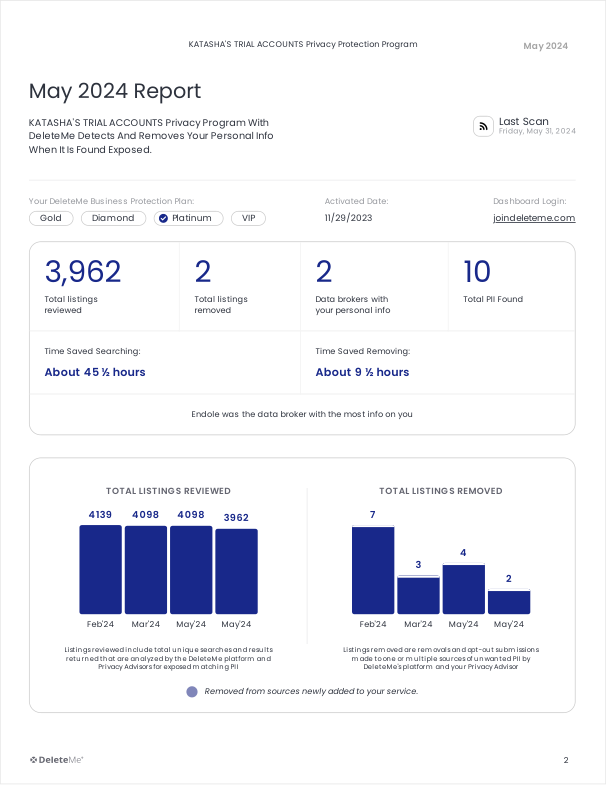

In [5]:
page = doc[2] # Select page 2 (starting from zero)

def pix2img(buf, clip = None):
    if clip == None:
        pix = buf.get_pixmap()
    else:
        pix = buf.get_pixmap(clip=clip)
    mode = "RGBA" if pix.alpha else "RGB" # Set colour mode based on alpha layer
    img = Image.frombytes(mode, [pix.width, pix.height], pix.samples) # Generate a PIL Image
    return img

img = pix2img(page)
img

## Extracting data

We've created a page, then a PIL image, now we need to extract data. PyMuPDF has different ways to do this but the bounding box method ("Rect" in PyMuPDF speak) is generally the easiest.

A "Rect" is a 4 integer tuple representing the following in order:

- x0 - Left edge
- y0 - Top edge
- x1 - Right edge
- y1 - Bottom edge

Values are in dots, normally 72 dpi

In [12]:
page = doc[2]

rect = (500, 130, 600, 150)
report_date = page.get_textbox(rect)
print(report_date) # Wahoo

Friday, May 31, 2024


In [21]:
# Lets get some data

page = doc[2] # We specify the page because cells can run out of order.
rect = (0,250, 600, 280)
listings = doc[2].get_textbox(rect).split('\n')

summary = {
    'total_listings_reviewed': listings[0].replace(',',''), #This removes commas in the number
    'total_listings_removed': listings[1],
    'brokers_with_pii': listings[2],
    'total_pii_found': listings[3]
}

data = {
    'report_date': report_date,
    'summary': summary,
}
data

{'report_date': 'Friday, May 31, 2024',
 'summary': {'total_listings_reviewed': '3962',
  'total_listings_removed': '2',
  'brokers_with_pii': '2',
  'total_pii_found': '10'}}